In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data_dir = "C:/Users/pelum/OneDrive - Emory University/Fall 20'/Big Data/Final Project/"

In [28]:
listc = ["Time","Alberta","British Columbia","Manitoba","Nova Scotia","Ontario","Quebec"]
lista = ["California","Colorado","Florida","Georgia","Hawaii","Illinois","Massachusetts"
         ,"Michigan","North Carolina","New Jersey","Nevada","New York","Texas","Virginia","Washington"]

In [29]:
us = pd.read_csv(data_dir + "US-bystate.csv")
us.columns.values[0] = "Index"
us = us.set_index("Index")
us = us.transpose()
us = us.reset_index()
Others = pd.read_csv(data_dir + "Others.csv")
impact = pd.read_csv(data_dir + "irport_traffic.csv")
canada = Others.loc[:,listc]

In [30]:
list = us.columns.values
list[0] = "Time"
us.columns = list
us.head()

,Time,New York,California,Florida,Hawaii,Nevada,Massachusetts,Texas,Illinois,New Jersey,Washington,Georgia,Virginia,Colorado,North Carolina,Michigan
0,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/26/2020,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/27/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
canada.head()

,Time,Alberta,British Columbia,Manitoba,Nova Scotia,Ontario,Quebec
0,1/23/2020,0,0,0,0,0,0
1,1/24/2020,0,0,0,0,0,0
2,1/25/2020,0,0,0,0,0,0
3,1/26/2020,0,0,0,0,1,0
4,1/27/2020,0,0,0,0,0,0


In [32]:
impact.head()

,Date,PercentOfBaseline,State
0,3/16/2020,92,New South Wales
1,3/16/2020,96,Santiago Province
2,3/16/2020,100,Alberta
3,3/16/2020,63,Alberta
4,3/16/2020,100,British Columbia


In [33]:
cali_inf = us.loc[:,["Time","Hawaii"]]
cali_inf = cali_inf.reset_index()
cali_inf = cali_inf.drop("index",axis=1)
cali_inf.head()

,Time,Hawaii
0,1/23/2020,0
1,1/24/2020,0
2,1/25/2020,0
3,1/26/2020,0
4,1/27/2020,0


In [34]:
cali_imp = impact.loc[impact.State == "Hawaii",:]
cali_imp = cali_imp.reset_index()
cali_imp = cali_imp.drop("index",axis=1)
cali_imp.head()

,Date,PercentOfBaseline,State
0,3/16/2020,95,Hawaii
1,3/17/2020,95,Hawaii
2,3/18/2020,90,Hawaii
3,3/19/2020,93,Hawaii
4,3/20/2020,86,Hawaii


In [35]:
index1 = cali_inf["Time"].values.tolist()
index1 = index1.index("3/16/2020")
index2 = cali_inf["Time"].values.tolist()
index2 = index2.index("10/17/2020")
cali_inf = cali_inf.iloc[index1:index2,:]
cali_inf.shape

(215, 2)

In [36]:
cali_imp = cali_imp.drop("State",axis=1)
cali_imp.head()

,Date,PercentOfBaseline
0,3/16/2020,95
1,3/17/2020,95
2,3/18/2020,90
3,3/19/2020,93
4,3/20/2020,86


In [37]:
cali_imp = cali_imp.groupby("Date").mean()
cali_imp = cali_imp.reset_index()
cali_imp

,Date,PercentOfBaseline
0,10/1/2020,100
1,10/10/2020,84
2,10/11/2020,82
3,10/12/2020,86
4,10/13/2020,90
...,...,...
209,9/5/2020,83
210,9/6/2020,97
211,9/7/2020,50
212,9/8/2020,65


In [38]:
cali_inf.to_csv(r"C:/Users/pelum/OneDrive - Emory University/Fall 20'/Big Data/Final Project/states/haw_inf.csv", index=False, header=True)
cali_imp.to_csv(r"C:/Users/pelum/OneDrive - Emory University/Fall 20'/Big Data/Final Project/states/haw_imp.csv", index=False, header=True)

In [73]:
cali = pd.read_csv(data_dir + "haw.csv")
cali.head()

,Time,Hawaii,PercentOfBaseline
0,3/16/2020,2,95.0
1,3/17/2020,2,95.0
2,3/18/2020,5,90.0
3,3/19/2020,10,93.0
4,3/20/2020,11,86.0


In [74]:
N = 5
cali = cali.groupby(cali.index // N).mean()

In [75]:
cali = cali.reset_index()
cali["change"] = 0
for i in range(len(cali)):
    if i == 0:
        continue
    else:
        cali.iloc[i,3] = (cali.iloc[i,1] - cali.iloc[i-1,1])/cali.iloc[i-1,1]

In [76]:
cali = cali.iloc[1:,:]
cali.head()

,index,Hawaii,PercentOfBaseline,change
1,1,11.0,97.4,0.833333
2,2,16.8,96.4,0.527273
3,3,35.2,88.6,1.095238
4,4,18.2,92.6,-0.482955
5,5,13.8,81.0,-0.241758


In [77]:
N = 1
tmp1 = pd.DataFrame(cali.PercentOfBaseline[:20])
tmp1["change"] = cali.iloc[(N):(20+N),3].tolist()
cali = tmp1[:]
cali.head()
cali = cali.reset_index()

In [78]:
cali

,index,PercentOfBaseline,change
0,1,97.4,0.527273
1,2,96.4,1.095238
2,3,88.6,-0.482955
3,4,92.6,-0.241758
4,5,81.0,0.000000
5,6,78.6,-0.695652
6,7,80.4,-0.428571
7,8,78.6,-0.333333
8,9,77.8,0.250000
9,10,78.2,-0.400000


C:\Users\pelum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


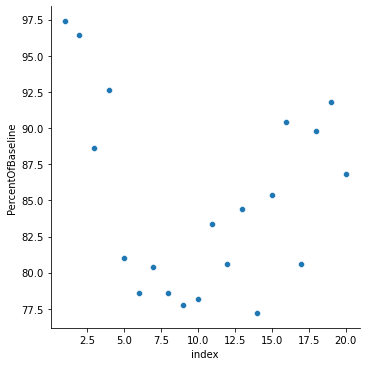

In [79]:
sns.relplot("index","PercentOfBaseline",data = cali)

C:\Users\pelum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='index', ylabel='change'>

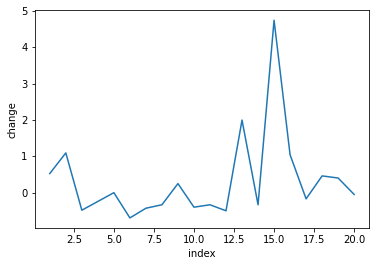

In [80]:
sns.lineplot("index","change",data = cali)

C:\Users\pelum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='index', ylabel='PercentOfBaseline'>

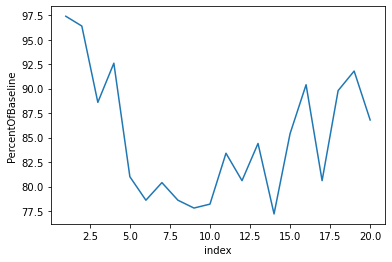

In [81]:
sns.lineplot("index","PercentOfBaseline",data = cali)

In [82]:
from statsmodels.api import OLS
OLS(cali.change,cali.PercentOfBaseline).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 change   R-squared (uncentered):                   0.079
Model:                            OLS   Adj. R-squared (uncentered):              0.031
Method:                 Least Squares   F-statistic:                              1.633
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                       0.217
Time:                        00:10:37   Log-Likelihood:                         -32.033
No. Observations:                  20   AIC:                                      66.07
Df Residuals:                      19   BIC:                                      67.06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
PercentOfBaseline     0.0041      0.003      1.278      0.217      -0.003       0.011
==============================================================================
Omnibus:                       30.114   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.381
Skew:                           2.537   Prob(JB):                     5.71e-13
Kurtosis:                       9.474   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
cali.to_csv(r"C:/Users/pelum/OneDrive - Emory University/Fall 20'/Big Data/Final Project/best_r2/hawaii.csv", index=False, header=True)